In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.fft import rfft, irfft, rfftfreq

import analysis_utils as utils
import importlib

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:110: SyntaxWarning: invalid escape sequence '\g'
  f'$\gamma$ = {popt[3]/(2*np.pi):.1f} Hz, \n'
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:111: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma$ = {popt[2]/(2*np.pi):.1f} Hz')


In [2]:
yale_colors = ['#00356b', '#286dc0', '#63aaff', '#4a4a4a']
utils.load_plotting_setting()

In [213]:
importlib.reload(utils)

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:110: SyntaxWarning: invalid escape sequence '\g'
  f'$\gamma$ = {popt[3]/(2*np.pi):.1f} Hz, \n'
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:111: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma$ = {popt[2]/(2*np.pi):.1f} Hz')


<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py'>

## Quick look on the data

In [62]:
folder = r'/Users/yuhan/work/nanospheres/data/20240919_two_e_data'
dataset = r'20240919_10v_4e-8mbar_0_07_analog_gain'
combined_path = os.path.join(folder, dataset, '**/*.mat')
data_files = glob.glob(combined_path)

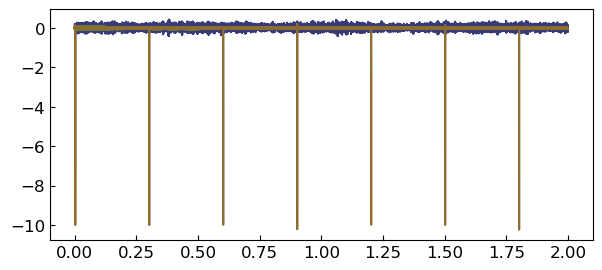

In [66]:
dtt, tt, nn = utils.load_timestreams(data_files[0], ['D', 'G'])

fs = int(np.ceil(1/dtt))

zz, dd = nn[0], nn[1]
zz_bp = utils.bandpass_filtered(zz, fs, 40000, 130000)

plt.plot(tt, zz)
plt.plot(tt, zz_bp)
plt.plot(tt, dd)

<>:22: SyntaxWarning: invalid escape sequence '\g'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\g'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_22830/3389820342.py:22: SyntaxWarning: invalid escape sequence '\g'
  f'$\gamma$ = {popt[3]/(2*np.pi):.1f} Hz\n'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_22830/3389820342.py:23: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma$ = {popt[2]/(2*np.pi):.1f} Hz')


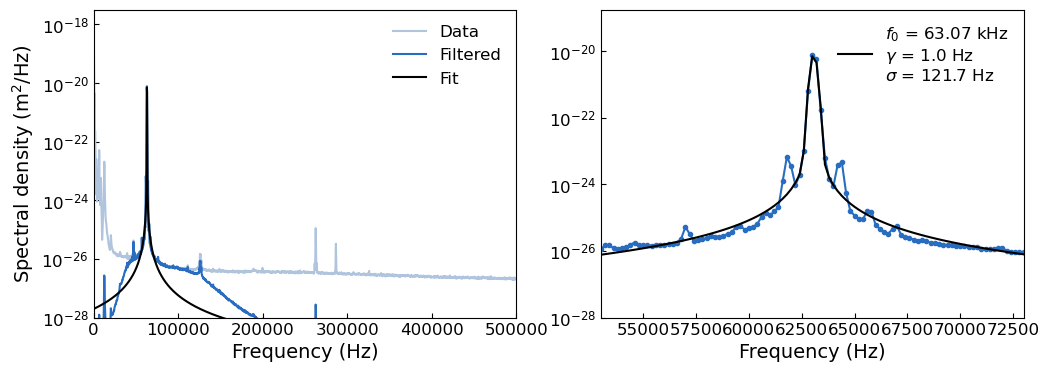

In [67]:
ccal = 209569452119457.41
ffz, ppz = utils.get_psd(dt=dtt, zz=zz, nperseg=25000)
ffz_bp, ppz_bp = utils.get_psd(dt=dtt, zz=zz_bp, nperseg=25000)

# Fit with a voigt profile
popt = utils.fit_z_peak(ffz_bp, ppz_bp, utils.log_voigt, (53000, 73000), [1e-5, 63000*2*np.pi, 30, 1], False)
omega0, gamma = popt[1], popt[3]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(ffz, ppz/ccal, 'lightsteelblue', label='Data')
axes[0].plot(ffz_bp, ppz_bp/ccal, yale_colors[1], label='Filtered')
axes[0].plot(ffz, np.exp(utils.log_voigt(ffz*2*np.pi, *popt))/ccal, 'k', label='Fit')
axes[0].set_yscale('log')
axes[0].set_xlim(0, 500000)
axes[0].set_ylim(1e-28)
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Spectral density (m$^2$/Hz)')
axes[0].legend(frameon=False)

label = (f'$f_0$ = {popt[1]/(2*np.pi*1000):.2f} kHz\n'\
         f'$\gamma$ = {popt[3]/(2*np.pi):.1f} Hz\n'
         f'$\sigma$ = {popt[2]/(2*np.pi):.1f} Hz')
axes[1].plot(ffz_bp, ppz_bp/ccal, yale_colors[1], marker='.')
axes[1].plot(ffz, np.exp(utils.log_voigt(ffz*2*np.pi, *popt))/ccal, 'k', label=label)
axes[1].set_yscale('log')
axes[1].set_xlim(53000, 73000)
axes[1].set_ylim(1e-28)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].legend(frameon=False)

## Check variation in the drive signal

3876.0515956335103

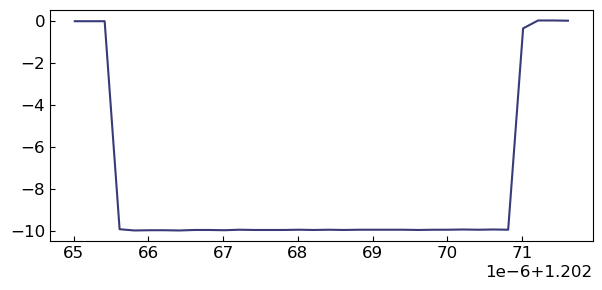

In [68]:
drive_indices = utils.get_pulse_idx(dd, -0.5, False)

i = 4
window = utils.get_drive_window(tt, drive_indices[i], 31)
plt.plot(tt[window], dd[window])

utils.get_drive_amp(2, tt, dd, window)

In [25]:
drive_amp = []
for file in data_files:
    dtt, tt, nn = utils.load_timestreams(file, ['G'])
    dd = nn[0]
    
    indices = utils.get_pulse_idx(dd, -1, False)
    
    for i, idx in enumerate(indices):
        if idx < 100000:
            continue
        window = utils.get_drive_window(tt, idx, 34)
        drive_amp.append(utils.get_drive_amp(2, tt, dd, window))
        
drive_amp = np.asarray(drive_amp)

Standard deviation: 60.8 keV


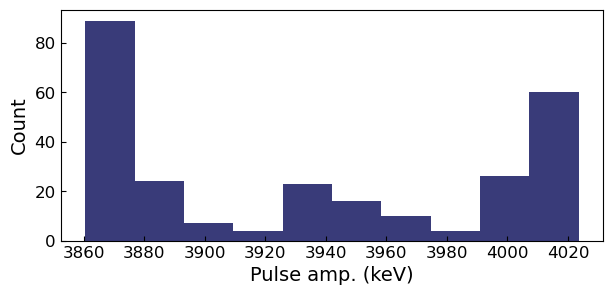

In [38]:
plt.hist(drive_amp)
plt.xlabel('Pulse amp. (keV)')
plt.ylabel('Count')
print(f'Standard deviation: {np.std(drive_amp):.1f} keV')

In [97]:
importlib.reload(utils)

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:110: SyntaxWarning: invalid escape sequence '\g'
  f'$\gamma$ = {popt[3]/(2*np.pi):.1f} Hz, \n'
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:111: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma$ = {popt[2]/(2*np.pi):.1f} Hz')


<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py'>

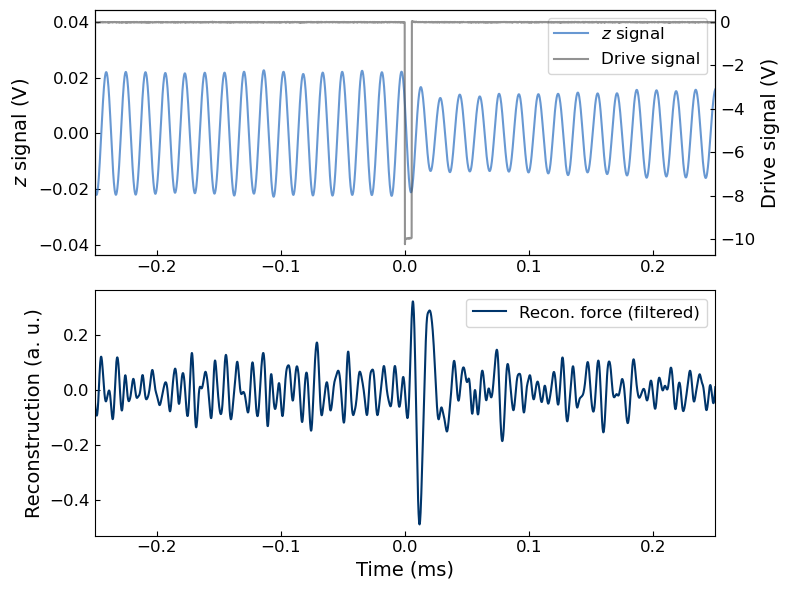

In [179]:
idx = drive_indices[6]
a, b, c, d = utils.recon_pulse(idx, dtt, tt, zz_bp, dd, True, None, 500000, 10000, search_window_length=40, pulse_length=30)

## Run reconstruction through all the files

In [202]:
importlib.reload(utils)

<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py'>

### Analog gain = 0.07

In [197]:
folder = r'/Users/yuhan/work/nanospheres/data/20240919_two_e_data'

unnormalized_amps = []
datasets = ['20240919_1v_4e-8mbar_0_07_analog_gain', '20240919_2_5v_4e-8mbar_0_07_analog_gain', 
            '20240919_5v_4e-8mbar_0_07_analog_gain', '20240919_10v_4e-8mbar_0_07_analog_gain']
pulseamps = [400, 1000, 2000, 4000]
for i, dataset in enumerate(datasets):
    print(dataset)
    combined_path = os.path.join(folder, dataset, '**/*.mat')
    data_files = glob.glob(combined_path)
    
    unnormalized_amps.append(utils.get_unnormalized_amps(data_files, False))

20240919_1v_4e-8mbar_0_07_analog_gain
20240919_2_5v_4e-8mbar_0_07_analog_gain
20240919_5v_4e-8mbar_0_07_analog_gain
20240919_10v_4e-8mbar_0_07_analog_gain


In [198]:
unnormalized_amps = [amps[~np.isnan(amps)] for amps in unnormalized_amps]

norm_factor = 4000 / np.mean(unnormalized_amps[3])
normalized_amps = [amp *norm_factor for amp in unnormalized_amps]

In [199]:
hhs, bcs, gps = [], [], []
for amp in normalized_amps:
    bins = np.linspace(0, np.max(amp)*1.5, 50)
    hh, be = np.histogram(amp, bins=bins)
    bc = 0.5 * (be[1:] + be[:-1])
    
    gp, gcov = curve_fit(utils.gauss, bc, hh, p0=[np.max(hh), np.mean(np.abs(amp)), np.std(np.abs(amp))])
    
    hhs.append(hh)
    bcs.append(bc)
    gps.append(gp)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_22830/1075090421.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV, $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])


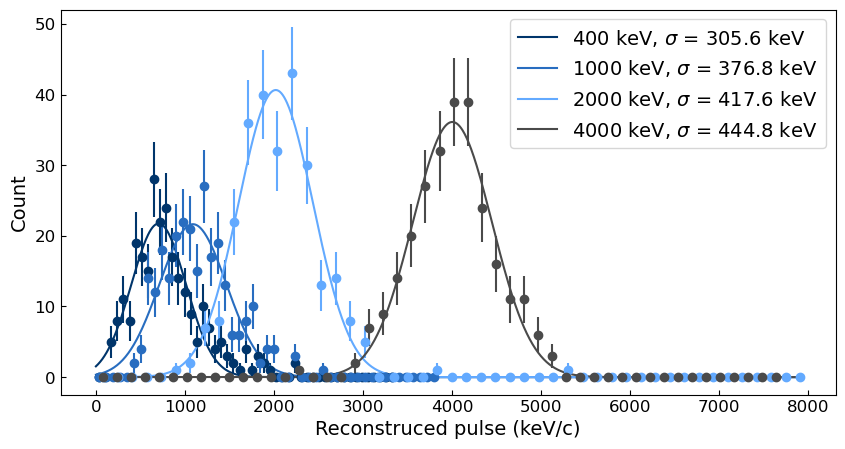

In [200]:
fig, ax = plt.subplots(figsize=(10, 5))
xx = np.linspace(0, np.max(np.asarray(bcs).flatten()), 1000)

for i, _ in enumerate(normalized_amps):
    ax.errorbar(bcs[i], hhs[i], yerr=np.sqrt(hhs[i]), fmt='o', color=yale_colors[i])
    ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV, $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])

ax.set_xlabel('Reconstruced pulse (keV/c)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(fontsize=14)

### Analog gain = 0.03

In [164]:
folder = r'/Users/yuhan/work/nanospheres/data/20240919_two_e_data'

unnormalized_amps = []
datasets = ['20240919_1v_4e-8mbar_0_03_analog_gain', '20240919_2_5v_4e-8mbar_0_03_analog_gain', 
            '20240919_5v_4e-8mbar_0_03_analog_gain', '20240919_10v_4e-8mbar_0_03_analog_gain']
pulseamps = [400, 1000, 2000, 4000]
for i, dataset in enumerate(datasets):
    print(dataset)
    combined_path = os.path.join(folder, dataset, '**/*.mat')
    data_files = glob.glob(combined_path)
    
    unnormalized_amps.append(utils.get_unnormalized_amps(data_files, False))

20240919_1v_4e-8mbar_0_03_analog_gain
20240919_2_5v_4e-8mbar_0_03_analog_gain
20240919_5v_4e-8mbar_0_03_analog_gain
20240919_10v_4e-8mbar_0_03_analog_gain


In [165]:
unnormalized_amps = [amps[~np.isnan(amps)] for amps in unnormalized_amps]

norm_factor = 4000 / np.mean(unnormalized_amps[-1])
normalized_amps = [amp *norm_factor for amp in unnormalized_amps]

In [166]:
hhs, bcs, gps = [], [], []
for amp in normalized_amps:
    bins = np.linspace(0, np.max(amp)*1.5, 50)
    hh, be = np.histogram(amp, bins=bins)
    bc = 0.5 * (be[1:] + be[:-1])
    
    gp, gcov = curve_fit(utils.gauss, bc, hh, p0=[np.max(hh), np.mean(np.abs(amp)), np.std(np.abs(amp))])
    
    hhs.append(hh)
    bcs.append(bc)
    gps.append(gp)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_22830/1075090421.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV, $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])


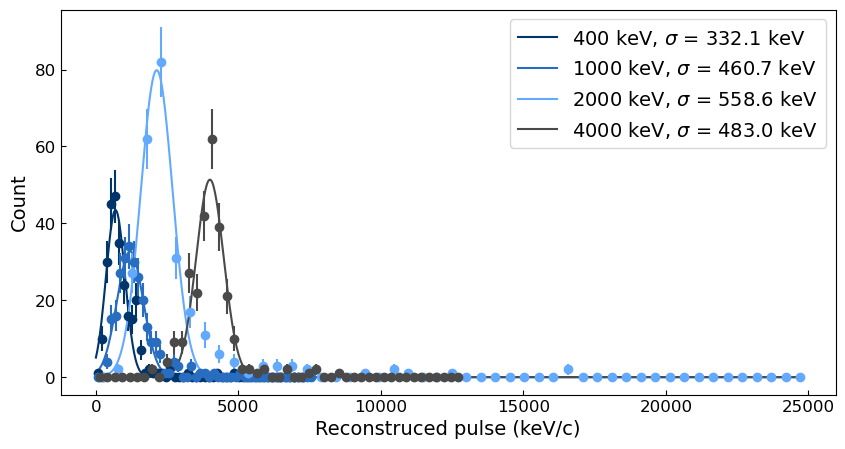

In [167]:
fig, ax = plt.subplots(figsize=(10, 5))
xx = np.linspace(0, np.max(np.asarray(bcs).flatten()), 1000)

for i, _ in enumerate(normalized_amps):
    ax.errorbar(bcs[i], hhs[i], yerr=np.sqrt(hhs[i]), fmt='o', color=yale_colors[i])
    ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV, $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])

ax.set_xlabel('Reconstruced pulse (keV/c)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(fontsize=14)

In [171]:
folder = r'/Users/yuhan/work/nanospheres/data/20240919_two_e_data'

unnormalized_amps_noise = []
datasets = ['20240919_1v_4e-8mbar_0_03_analog_gain', '20240919_2_5v_4e-8mbar_0_03_analog_gain', 
            '20240919_5v_4e-8mbar_0_03_analog_gain', '20240919_10v_4e-8mbar_0_03_analog_gain']
pulseamps = [400, 1000, 2000, 4000]
for i, dataset in enumerate(datasets):
    print(i, dataset)
    combined_path = os.path.join(folder, dataset, '**/*.mat')
    data_files = glob.glob(combined_path)
    
    unnormalized_amps_noise.append(utils.get_unnormalized_amps(data_files, True))

0 20240919_1v_4e-8mbar_0_03_analog_gain
1 20240919_2_5v_4e-8mbar_0_03_analog_gain
2 20240919_5v_4e-8mbar_0_03_analog_gain
3 20240919_10v_4e-8mbar_0_03_analog_gain


In [172]:
unnormalized_amps_noise = [amps[~np.isnan(amps)] for amps in unnormalized_amps_noise]
normalized_amps_noise = [amp * norm_factor for amp in unnormalized_amps_noise]

In [174]:
hhs, bcs, gps = [], [], []
for amp in normalized_amps_noise:
    bins = np.linspace(0, np.max(amp)*1.5, 50)
    hh, be = np.histogram(amp, bins=bins)
    bc = 0.5 * (be[1:] + be[:-1])
    
    gp, gcov = curve_fit(utils.gauss, bc, hh, p0=[np.max(hh), np.mean(np.abs(amp)), np.std(np.abs(amp))])
    
    hhs.append(hh)
    bcs.append(bc)
    gps.append(gp)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_22830/3097949257.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i], linestyle='--')


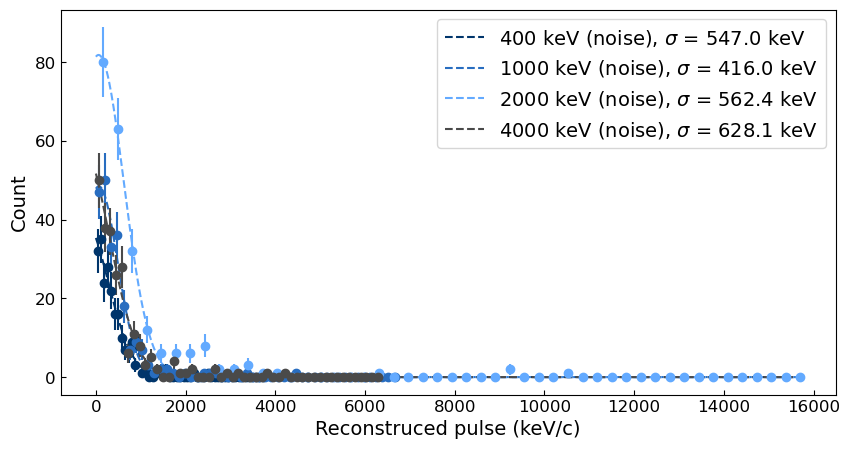

In [175]:
fig, ax = plt.subplots(figsize=(10, 5))
xx = np.linspace(0, np.max(np.asarray(bcs).flatten()), 1000)

for i, _ in enumerate(normalized_amps_noise):
    ax.errorbar(bcs[i], hhs[i], yerr=np.sqrt(hhs[i]), fmt='o', color=yale_colors[i])
    ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i], linestyle='--')

ax.set_xlabel('Reconstruced pulse (keV/c)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(fontsize=14)

### Analog gain = 0.07, use backscatter signal for z feedback

In [230]:
importlib.reload(utils)

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:110: SyntaxWarning: invalid escape sequence '\g'
  f'$\gamma$ = {popt[3]/(2*np.pi):.1f} Hz, \n'
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py:111: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma$ = {popt[2]/(2*np.pi):.1f} Hz')


<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_utils.py'>

In [231]:
folder = r'/Users/yuhan/work/nanospheres/data/20240920_two_e_data'

unnormalized_amps = []
datasets = ['20240920_1v_2e-8mbar_0_07_analog_gain_backscatter', '20240920_2_5v_2e-8mbar_0_07_analog_gain_backscatter', 
            '20240920_5v_2e-8mbar_0_07_analog_gain_backscatter', '20240920_10v_2e-8mbar_0_07_analog_gain_backscatter']
pulseamps = [400, 1000, 2000, 4000]
for i, dataset in enumerate(datasets):
    print(dataset)
    combined_path = os.path.join(folder, dataset, '**/*.mat')
    data_files = glob.glob(combined_path)
    
    unnormalized_amps.append(utils.get_unnormalized_amps(data_files, False))

20240920_1v_2e-8mbar_0_07_analog_gain_backscatter
20240920_2_5v_2e-8mbar_0_07_analog_gain_backscatter
20240920_5v_2e-8mbar_0_07_analog_gain_backscatter
20240920_10v_2e-8mbar_0_07_analog_gain_backscatter


In [232]:
unnormalized_amps = [amps[~np.isnan(amps)] for amps in unnormalized_amps]

norm_factor = 4000 / np.mean(unnormalized_amps[-1])
normalized_amps = [amp *norm_factor for amp in unnormalized_amps]

In [233]:
hhs, bcs, gps = [], [], []
for amp in normalized_amps:
    bins = np.linspace(0, np.max(amp)*1.5, 50)
    hh, be = np.histogram(amp, bins=bins)
    bc = 0.5 * (be[1:] + be[:-1])
    
    gp, gcov = curve_fit(utils.gauss, bc, hh, p0=[np.max(hh), np.mean(np.abs(amp)), np.std(np.abs(amp))])
    
    hhs.append(hh)
    bcs.append(bc)
    gps.append(gp)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_22830/1075090421.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV, $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])


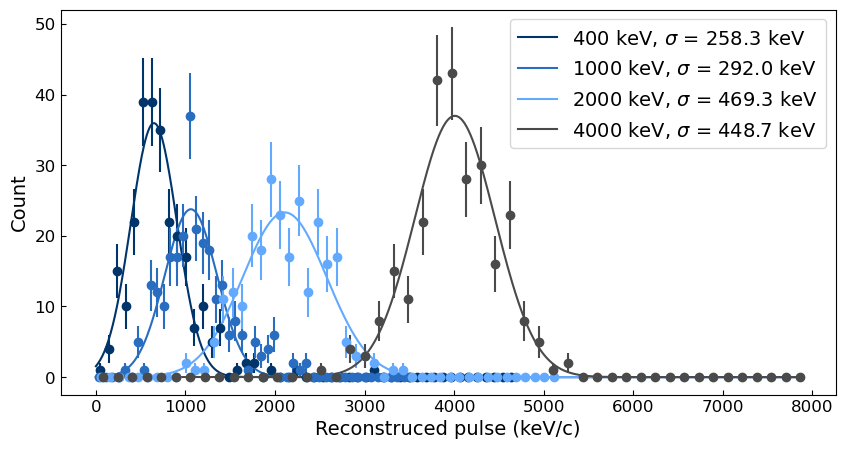

In [234]:
fig, ax = plt.subplots(figsize=(10, 5))
xx = np.linspace(0, np.max(np.asarray(bcs).flatten()), 1000)

for i, _ in enumerate(normalized_amps):
    ax.errorbar(bcs[i], hhs[i], yerr=np.sqrt(hhs[i]), fmt='o', color=yale_colors[i])
    ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV, $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i])

ax.set_xlabel('Reconstruced pulse (keV/c)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(fontsize=14)

Noise

In [207]:
folder = r'/Users/yuhan/work/nanospheres/data/20240920_two_e_data'

unnormalized_amps_noise = []
datasets = ['20240920_1v_2e-8mbar_0_07_analog_gain_backscatter', '20240920_2_5v_2e-8mbar_0_07_analog_gain_backscatter', 
            '20240920_5v_2e-8mbar_0_07_analog_gain_backscatter', '20240920_10v_2e-8mbar_0_07_analog_gain_backscatter']
pulseamps = [400, 1000, 2000, 4000]
for i, dataset in enumerate(datasets):
    print(i, dataset)
    combined_path = os.path.join(folder, dataset, '**/*.mat')
    data_files = glob.glob(combined_path)
    
    unnormalized_amps_noise.append(utils.get_unnormalized_amps(data_files, True))

0 20240920_1v_2e-8mbar_0_07_analog_gain_backscatter
1 20240920_2_5v_2e-8mbar_0_07_analog_gain_backscatter
2 20240920_5v_2e-8mbar_0_07_analog_gain_backscatter
3 20240920_10v_2e-8mbar_0_07_analog_gain_backscatter


In [208]:
unnormalized_amps_noise = [amps[~np.isnan(amps)] for amps in unnormalized_amps_noise]
normalized_amps_noise = [amp * norm_factor for amp in unnormalized_amps_noise]

In [209]:
hhs, bcs, gps = [], [], []
for amp in normalized_amps_noise:
    bins = np.linspace(0, np.max(amp)*1.5, 50)
    hh, be = np.histogram(amp, bins=bins)
    bc = 0.5 * (be[1:] + be[:-1])
    
    gp, gcov = curve_fit(utils.gauss, bc, hh, p0=[np.max(hh), np.mean(np.abs(amp)), np.std(np.abs(amp))])
    
    hhs.append(hh)
    bcs.append(bc)
    gps.append(gp)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_22830/3097949257.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i], linestyle='--')


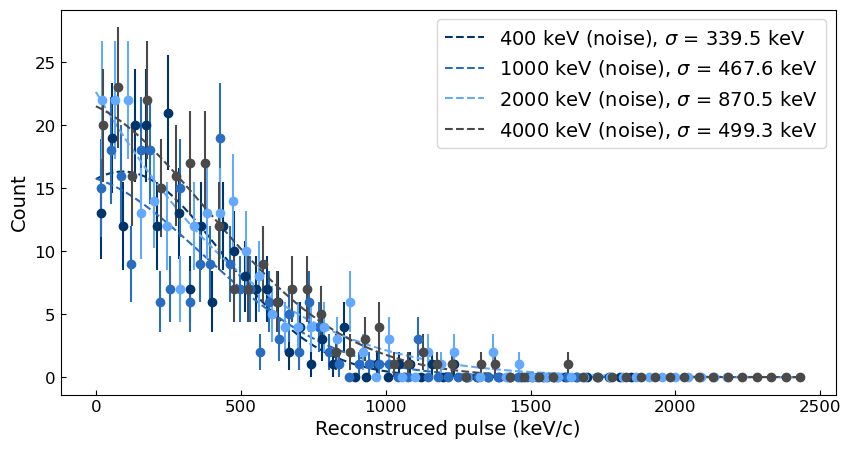

In [210]:
fig, ax = plt.subplots(figsize=(10, 5))
xx = np.linspace(0, np.max(np.asarray(bcs).flatten()), 1000)

for i, _ in enumerate(normalized_amps_noise):
    ax.errorbar(bcs[i], hhs[i], yerr=np.sqrt(hhs[i]), fmt='o', color=yale_colors[i])
    ax.plot(xx, utils.gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=yale_colors[i], linestyle='--')

ax.set_xlabel('Reconstruced pulse (keV/c)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(fontsize=14)